In [1]:
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.functions import *

# Cell to create a spark session
spark = (
    SparkSession.builder.appName("MAST30034 ASSIGNMENT 1 DUSTIN")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/08/19 15:13:25 WARN Utils: Your hostname, DESKTOP-3ADPNV0 resolves to a loopback address: 127.0.1.1; using 172.29.53.33 instead (on interface eth0)
22/08/19 15:13:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/19 15:13:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/19 15:13:30 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/08/19 15:13:30 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [1]:
#cell for all imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib import *
from statsmodels.formula.api import ols, glm


In [2]:
# cell to load the aggregated data

aggregate_date = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_date')
aggregate_weekday = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_weekday')
aggregate_weekend = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_weekend')
aggregate_win = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_win')
aggregate_lose = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_lose')
aggregate_start = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_start')
aggregate_PU = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_PU')
aggregate_DO = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_DO')

In [3]:
aggregate_date.rename(columns = {'mean_tip':'mean tip', 'mean_distance':'mean distance', 'mean_fare' : 'mean fare',
                           'mean_total' : 'mean total cost', 'mean_length' : 'mean trip time', 
                            'mean_margin' : 'mean score margin', 'mean_attendance' : 'mean attendance' }, inplace = True )
aggregate_date

,date,mean tip,mean distance,mean fare,mean total cost,mean trip time,mean score margin,mean attendance
0,2018-10-17,2.1856,1.9649,10.5971,14.0219,13.1581,19.0,18249.0
1,2018-10-20,2.0830,2.0786,10.4644,13.5894,12.4323,-2.0,19427.0
2,2018-10-26,2.1301,1.9315,10.4513,13.8198,12.9489,-28.0,19812.0
3,2018-10-29,2.1076,2.0071,10.1668,13.5296,11.9771,19.0,19221.0
4,2018-10-31,2.0861,1.9333,10.2098,13.5241,12.3031,-6.0,18295.0
5,2018-11-05,2.1121,1.9291,10.2613,13.6225,12.5890,-1.0,19812.0
6,2018-11-11,2.0881,2.1319,10.4366,13.5995,12.0614,-26.0,19812.0
7,2018-11-20,2.1076,1.8736,10.2946,13.6276,12.8690,-4.0,19812.0
8,2018-11-23,1.9953,1.9833,9.5126,12.7763,10.3960,5.0,18948.0
9,2018-12-01,2.0671,1.9830,10.3111,13.4179,12.4687,2.0,19812.0


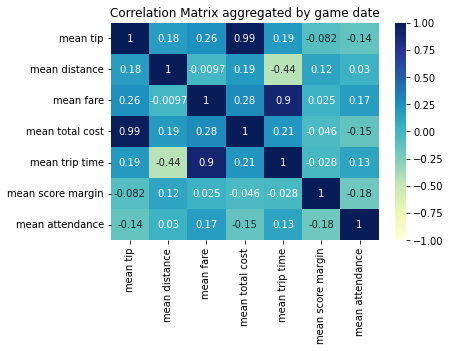

In [4]:

correlation_matrix = sns.heatmap(aggregate_date.corr(), cmap="YlGnBu", annot=True, vmin= -1, vmax=1)

plt.title('Correlation Matrix aggregated by game date')

plt.show()

In [5]:
correlation_matrix.set_xticklabels(correlation_matrix.get_xticklabels(), rotation = 60, horizontalalignment='right')
figure_correlation = correlation_matrix.get_figure()
figure_correlation.set_size_inches(12, 11)
figure_correlation.savefig('../../mast30034-project-1-dustintano10/plots/correlation_matrix.jpeg', dpi=400)

In [6]:
aggregate_weekday

,hour,mean_tip
0,0,2.3829
1,1,2.3112
2,2,2.2646
3,3,2.2599
4,4,2.3160
5,5,2.2701
6,6,2.0860
7,7,2.0010
8,8,1.9938
9,9,1.9897


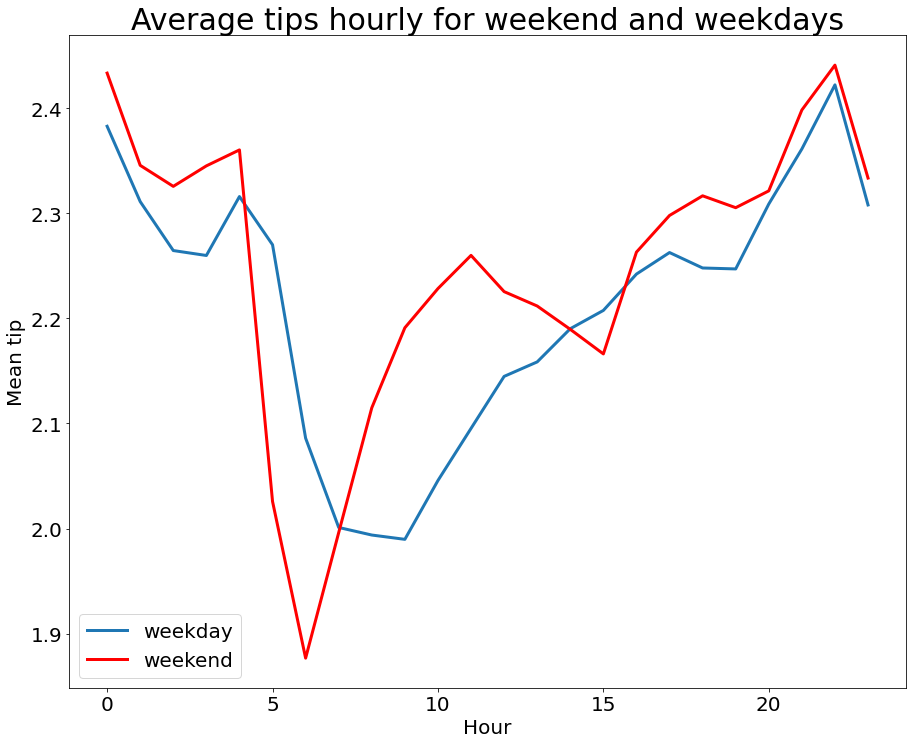

In [7]:
plt.figure(figsize=(15, 12))


plt.plot(aggregate_weekday.hour, aggregate_weekday.mean_tip, label='weekday', 
         linewidth=3)
plt.plot(aggregate_weekend.hour, aggregate_weekend.mean_tip, color='red', 
         label='weekend', linewidth=3)

plt.title('Average tips hourly for weekend and weekdays', fontsize=30)

plt.xlabel('Hour', fontsize=20)

plt.ylabel('Mean tip', fontsize=20)

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.legend(fontsize = 20)

plt.savefig('../../mast30034-project-1-dustintano10/plots/time_series_plot_weekday_weekend.jpeg')

plt.show()


In [8]:
aggregate_win

,hour,mean_tip
0,0,2.4295
1,1,2.3724
2,2,2.3492
3,3,2.3393
4,4,2.4081
5,5,2.1306
6,6,1.9468
7,7,2.0236
8,8,2.1141
9,9,2.1424


In [9]:
aggregate_lose

,hour,mean_tip
0,0,2.3945
1,1,2.3050
2,2,2.2560
3,3,2.2572
4,4,2.3053
5,5,2.0737
6,6,1.8952
7,7,1.9904
8,8,2.0878
9,9,2.1347


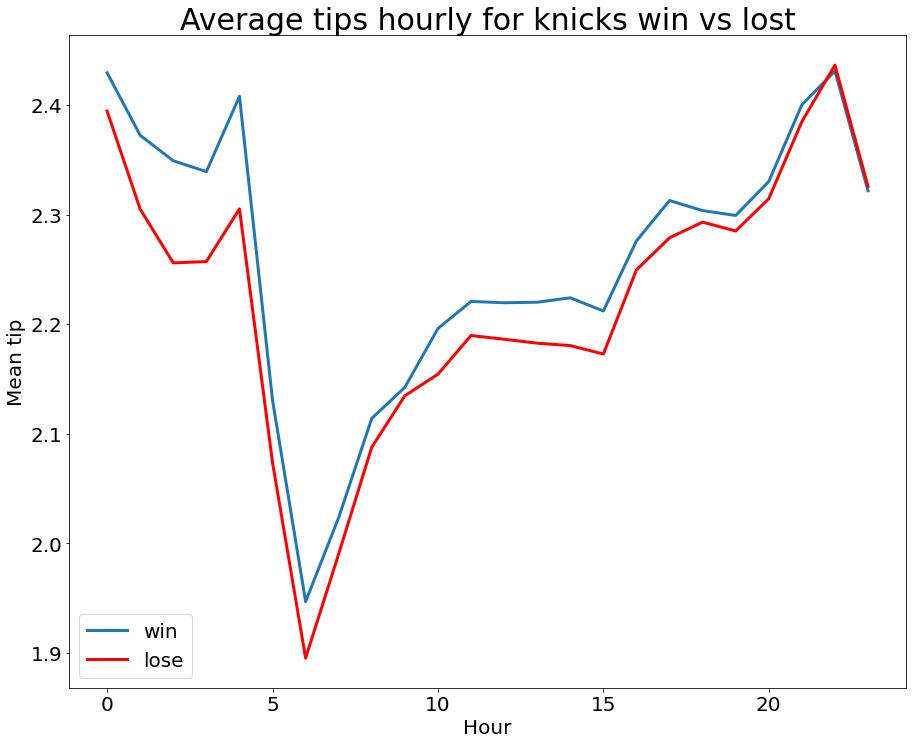

In [10]:
plt.figure(figsize=(15, 12))


plt.plot(aggregate_win.hour, aggregate_win.mean_tip, label='win', 
         linewidth=3)
plt.plot(aggregate_lose.hour, aggregate_lose.mean_tip, color='red', 
         label='lose', linewidth=3)

plt.title('Average tips hourly for knicks win vs lost', fontsize=30)

plt.xlabel('Hour', fontsize=20)

plt.ylabel('Mean tip', fontsize=20)

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.legend(fontsize = 20)

plt.savefig('../../mast30034-project-1-dustintano10/plots/time_series_plot_win_lost.jpeg')

plt.show()


In [11]:
aggregate_start

,start_time,mean_tip
0,12:00,2.3826
1,12:30,1.8716
2,13:00,2.1310
3,17:00,2.0671
4,19:30,2.2450
5,20:00,2.3070


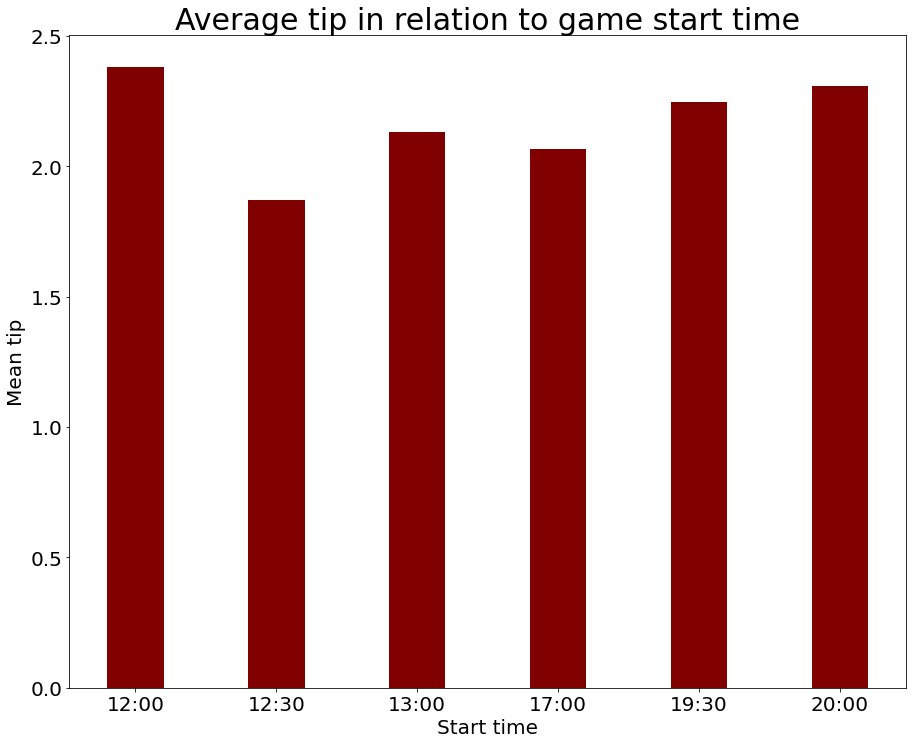

In [15]:
plt.figure(figsize=(15, 12))

plt.bar(aggregate_start.start_time, aggregate_start.mean_tip, color ='maroon',
        width = 0.4)
 
plt.xlabel("Start time", fontsize=20)

plt.ylabel("Mean tip", fontsize=20)

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.title("Average tip in relation to game start time", fontsize=30)

plt.savefig('../../mast30034-project-1-dustintano10/plots/bar_plot_gamestart.jpeg')

plt.show()

In [16]:
aggregate_PU

,Pickup_location,mean_tip
0,1,27.4225
1,2,3.2480
2,3,0.2753
3,4,2.2655
4,5,0.0000
...,...,...
253,259,0.3220
254,260,2.3608
255,261,2.9117
256,262,2.1498


In [17]:
# sf stands for shape file
sf = gpd.read_file("../../data/taxi_zones/taxi_zones.shp")
zones = pd.read_csv("../../data/taxi_zones/taxi+_zone_lookup.csv")

sf.head()

NameError: name 'gpd' is not defined